In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def plot_k_means(x, r, k):

    random_colors = np.random.random((k, 3))
    colors = r.dot(random_colors)
    plt.scatter(x[:,0], x[:,1], c=colors)
    plt.show()


def initialize_centers(x, num_k):
    N, D = x.shape
    centers = np.zeros((num_k, D))
    used_idx = []
    for k in range(num_k):
        idx = np.random.choice(N)
        while idx in used_idx:
            idx = np.random.choice(N)
        used_idx.append(idx)
        centers[k] = x[idx]
    return centers

def update_centers(x, r, K):
    N, D = x.shape
    centers = np.zeros((K, D))
    for k in range(K):
        centers[k] = r[:, k].dot(x) / r[:, k].sum()
    return centers

def square_dist(a, b):
    return (a - b) ** 2

def cost_func(x, r, centers, K):
    cost = 0
    for k in range(K):
        norm = np.linalg.norm(x - centers[k], 2)
        cost += (norm * np.expand_dims(r[:, k], axis=1) ).sum()
    return cost


def cluster_responsibilities(centers, x, beta):
    N, _ = x.shape
    K, D = centers.shape
    R = np.zeros((N, K))

    for n in range(N):        
        R[n] = np.exp(-beta * np.linalg.norm(centers - x[n], 2, axis=1)) 
    R /= R.sum(axis=1, keepdims=True)

    return R

def soft_k_means(x, K, max_iters=50, beta=1):
    centers = initialize_centers(x, K)
    prev_cost = 0
    for _ in range(max_iters):
        r = cluster_responsibilities(centers, x, beta)
        centers = update_centers(x, r, K)
        cost = cost_func(x, r, centers, K)
        if np.abs(cost - prev_cost) < 1e-5:
            break
        prev_cost = cost
        
    plot_k_means(x, r, K)


def data_preprocess_sonar(dataset):
    data = dataset.iloc[:,0:2] # remove the labels
    data_array = np.array(data)
    
    return data_array



def data_preprocess_bt(dataset):
    data = dataset.iloc[:,0:2] # remove the labels
    data_array = np.array(data)
    
    return data_array

    

    


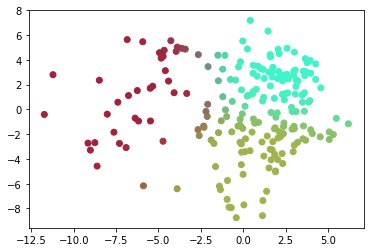

In [4]:
df = pd.read_csv("sonar_pca.csv")
x = data_preprocess_sonar(df)
soft_k_means(x, K=3)
#     print(x)

(1321,)


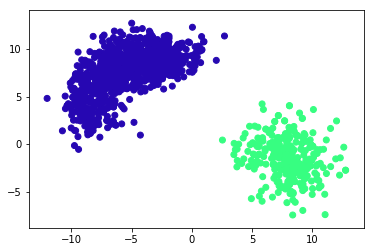

In [19]:
data = pd.read_csv('data_noah.csv')

# Getting the values and plotting it
f1 = data['x'].values
f2 = data['y'].values
category = data['pitch_type'].values
data = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)
print(f1.shape)

soft_k_means(data, K=2)

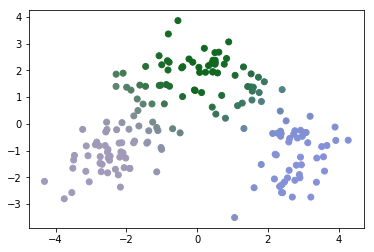

In [6]:
df_bt = pd.read_csv("wine_pca.csv")
x1 = data_preprocess_sonar(df_bt)
soft_k_means(x1, K=3)
    

(150,)


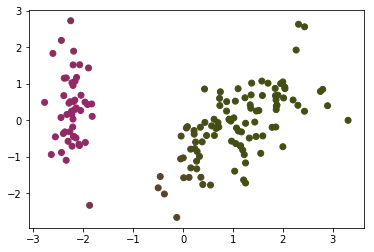

In [107]:

df = pd.read_csv("iris_after_pca.csv")
# print(df['species'])
df['species'] = pd.Categorical(df['species'])
# print(df.head())
df['species'] = df['species'].cat.codes
# print(df.head())

# data = df.iloc[:,1:3] # remove the labels
f1 = df["PC-1"].values
# f1.shape = ()
f2 = df["PC-2"].values
category = df['species'].values
data = np.array(list(zip(f1, f2)))
data_array = np.array(data)

true_labels = np.array(category)
# x1 = data_preprocess_sonar(df)
soft_k_means(data_array, K=3)
# print(data)

In [68]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score

import numpy as np
X = np.array(data_array)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [69]:
# kmeans.cluster_centers_

In [70]:
prediction = np.array(kmeans.predict(data_array))

In [78]:
evaluate = adjusted_rand_score(true_labels, prediction)
print("ARI for iris dataset:")
print(evaluate)

ARI for iris dataset:
0.620135180887


Text(0.5,1,'Elbow curve for iris dataset')

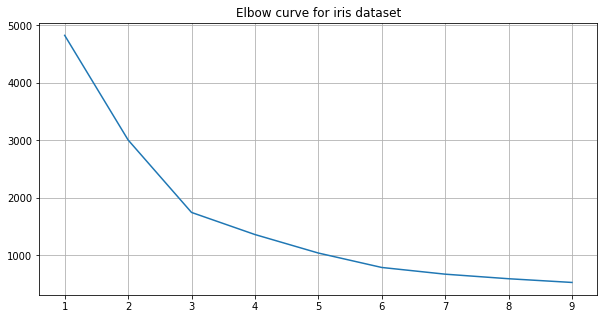

In [66]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

# X = data
distorsions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), distorsions)
plt.grid(True)
plt.title('Elbow curve for iris dataset')

In [ ]:
df_bt = pd.read_csv("wine_pca.csv")
x1 = data_preprocess_sonar(df_bt)



Text(0.5,1,'Elbow curve for wine dataset')

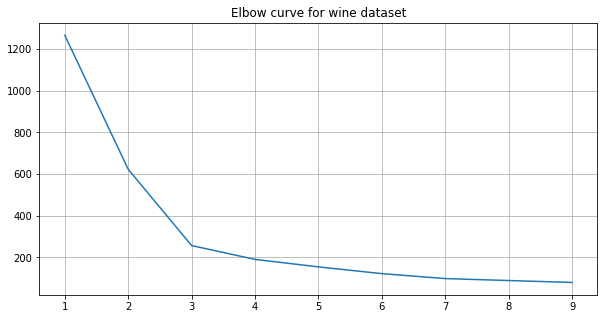

In [63]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

X = x1
distorsions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), distorsions)
plt.grid(True)
plt.title('Elbow curve for wine dataset')

In [136]:
data = pd.read_csv('data_noah.csv')

# Getting the values and plotting it
f1 = data['x'].values
f2 = data['y'].values
category = data['pitch_type'].values
true_label = np.array(category)
b, c = np.unique(true_label, return_inverse=True)
print(c)
data = np.array(list(zip(f1, f2)))

[2 2 2 ... 1 2 2]


In [141]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score

import numpy as np
X = np.array(data)
# print(X)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [142]:
prediction = np.array(kmeans.predict(data))

In [143]:
evaluate = adjusted_rand_score(c, prediction)
print("ARI for Noah dataset (c=3):")
print(evaluate)

ARI for Noah dataset (c=3):
0.539137019536


Text(0.5,1,'Elbow curve for noah dataset')

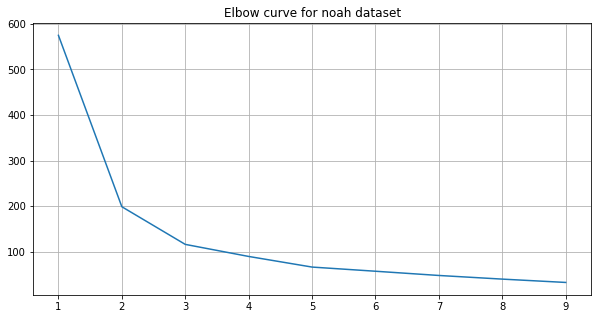

In [64]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

X = data
distorsions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), distorsions)
plt.grid(True)
plt.title('Elbow curve for noah dataset')

In [60]:
df = pd.read_csv("sonar_pca.csv")
x = data_preprocess_sonar(df)

Text(0.5,1,'Elbow curve for sonar dataset')

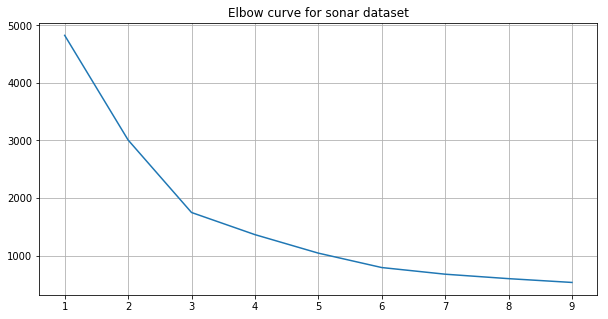

In [65]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

X = x
distorsions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), distorsions)
plt.grid(True)
plt.title('Elbow curve for sonar dataset')

In [144]:
df = pd.read_csv("wine_pca.csv")
# print(df.iloc[:,2:])
x = df.iloc[:,2:]
# print(x)
# print(df.head())
x = np.array(x)
b, c = np.unique(x, return_inverse=True)
# print(df.head())
# print(c)
# data = df.iloc[:,1:3] # remove the labels
f1 = df.iloc[:,0:1].values
f1.shape = (f1.size, )
print(f1.shape)
f2 = df.iloc[:,1:2].values
f2.shape = (f2.size, )
# print(f2)
# category = df[2].values
data = np.array(list(zip(f1, f2)))
data_array = np.array(data)
print(data_array.shape)
# true_labels = np.array(category)
# x1 = data_preprocess_sonar(df)
# soft_k_means(data_array, K=3)
# print(data)

(176,)
(176, 2)


In [145]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score

import numpy as np
X = np.array(data_array)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [146]:
prediction = np.array(kmeans.predict(data_array))

In [149]:
evaluate = adjusted_rand_score(c, prediction)
print("ARI for wine:")
print(evaluate)

ARI for wine:
0.894095040935
